In [1]:
import numpy as np
import pandas as pd
import data_processing as dp
import matplotlib.pyplot as plt
import reformat as rft

Use the fink data transfert service to download the needed ELASTiCC data : https://fink-portal.org/download

In [2]:
# Use this line to aggregate alerts. Get saved inside ftransfer folder
rft.aggregate_columns('ftransfer_elasticc_v1_2023-10-24_200706', 111)

In [6]:
data = pd.read_parquet(f'ftransfer_elasticc_v1_2023-10-24_200706/aggregated/classId=111.parquet').sample(n=1000)

In [7]:
%%time
data_plas = dp.elasticc_agg_to_plasticc(data)
formatted = dp.format_plasticc(data_plas, 100)
preprocessed = dp.preprocess(formatted)
features = dp.extract_rainbow(preprocessed)

/media3/etienne/workdir/spark_AGN/ELAsTiCC/Sigmoid_rainbow/data_processing.py:97: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp((t + t0) / trise))


CPU times: user 8.81 s, sys: 188 ms, total: 8.99 s
Wall time: 8.81 s


Careful ! This method is intended to work only on rising transient. Here no cuts are applied for the sake of the example.

a           0.969515
t0          8.481916
trise      -6.152329
Tmin     4385.972184
dT       6891.151129
ksig      120.543945
Name: 1, dtype: float64


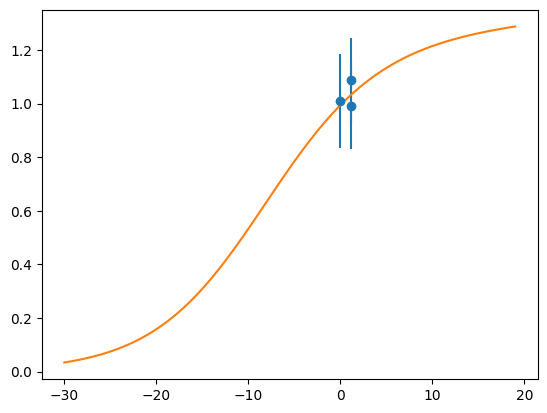

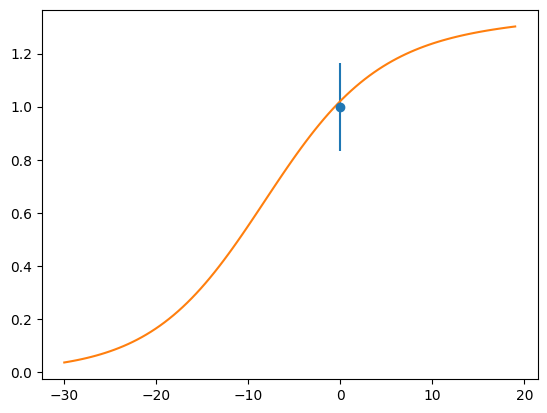

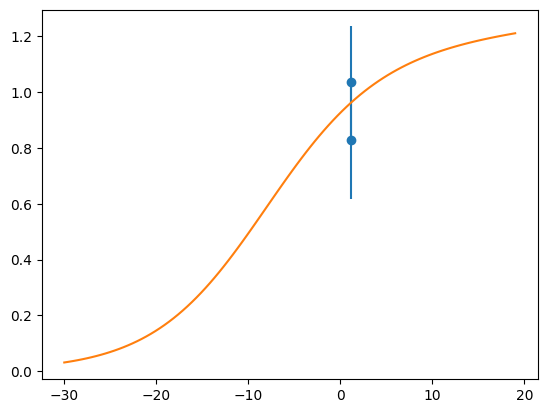

In [18]:
idx = 1
obj = preprocessed[idx]
params = features.iloc[idx][:6]
print(params)

for band in np.unique(obj['BAND']):
    sub = obj[obj['BAND']==band]
    f, ferr, t = sub['FLUXCAL'], sub['FLUXCALERR'], sub['MJD']
    nu = dp.freq_dic.get(band)
    
    X1 = np.array([np.linspace(-30, 19, 100)])
    X2 = np.array([[nu]*len(X1[0])])
    X = np.concatenate((X1, X2), axis = 0)


    plt.figure()
    plt.errorbar(t, f, yerr=ferr, fmt='o')
    plt.plot(X[0], dp.Fnu(X, *params))